In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../resources/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

#cities

615

In [6]:
# Perform API Calls
# Perform a weather check on each city using a series of successive API calls.

url = "http://api.openweathermap.org/data/2.5/weather"
units = "imperial"

lat = []
lng = []
temp_max = []
humidity = []
clouds = []
wind_speed = []
country = []
date = []
cities_found = []

#for city in cities:
for index, row in enumerate(cities):
    city_name = row
    
    params = {
    'appid': weather_api_key,
    'units': units,
    'q': city_name
    }
    
    print("Processing city name " + city_name + ": " + str(index))
    
    try:
        
        results = requests.get(url, params=params).json()
    
        lat.append(results['coord']['lat'])
        lng.append(results['coord']['lon'])
        temp_max.append(results['main']['temp_max'])
        humidity.append(results['main']['humidity'])
        clouds.append(results['clouds']['all'])
        wind_speed.append(results['wind']['speed'])
        country.append(results['sys']['country'])
        date.append(results['dt'])
        cities_found.append(city_name)
        
    except:
        
        print("Could not find " + city_name)
    
    

# Include a print log of each city as it's being processed (with the city number and city name).


Processing city name fortuna: 0
Processing city name nikolskoye: 1
Processing city name port alfred: 2
Processing city name arraial do cabo: 3
Processing city name sentyabrskiy: 4
Could not find sentyabrskiy
Processing city name umm bab: 5
Processing city name thompson: 6
Processing city name tilichiki: 7
Processing city name guerrero negro: 8
Processing city name airai: 9
Processing city name muborak: 10
Processing city name mar del plata: 11
Processing city name illoqqortoormiut: 12
Could not find illoqqortoormiut
Processing city name yerbogachen: 13
Processing city name seoul: 14
Processing city name rikitea: 15
Processing city name bluff: 16
Processing city name cidreira: 17
Processing city name ushuaia: 18
Processing city name bandarbeyla: 19
Processing city name tabat: 20
Processing city name atar: 21
Processing city name butaritari: 22
Processing city name port augusta: 23
Processing city name taolanaro: 24
Could not find taolanaro
Processing city name jamestown: 25
Processing c

Processing city name uwayl: 226
Could not find uwayl
Processing city name ngukurr: 227
Could not find ngukurr
Processing city name zabol: 228
Processing city name antofagasta: 229
Processing city name bilma: 230
Processing city name lagoa: 231
Processing city name vardo: 232
Processing city name poum: 233
Processing city name uglovskoye: 234
Processing city name severo-kurilsk: 235
Processing city name chuy: 236
Processing city name grand river south east: 237
Could not find grand river south east
Processing city name port macquarie: 238
Processing city name kota belud: 239
Processing city name north vanlaiphai: 240
Processing city name newcastle: 241
Processing city name kodiak: 242
Processing city name mitchell: 243
Processing city name itarema: 244
Processing city name rezina: 245
Processing city name sao filipe: 246
Processing city name bria: 247
Processing city name palmer: 248
Processing city name zhigansk: 249
Processing city name padang: 250
Processing city name lompoc: 251
Pro

Processing city name baykit: 447
Processing city name katherine: 448
Processing city name joshimath: 449
Processing city name mareeba: 450
Processing city name arauco: 451
Processing city name olafsvik: 452
Processing city name lakheri: 453
Processing city name san quintin: 454
Processing city name alofi: 455
Processing city name nuevo progreso: 456
Processing city name marienburg: 457
Processing city name jerusalem: 458
Processing city name ishimbay: 459
Processing city name chesma: 460
Processing city name samusu: 461
Could not find samusu
Processing city name mogadishu: 462
Processing city name churapcha: 463
Processing city name primorsk: 464
Processing city name mayor pablo lagerenza: 465
Processing city name barcelona: 466
Processing city name greenwood: 467
Processing city name iquique: 468
Processing city name kapuskasing: 469
Processing city name kristiansund: 470
Processing city name blackwater: 471
Processing city name saint simons: 472
Processing city name turbat: 473
Proce

In [10]:
# Convert Raw Data to DataFrame¶
weather_dict = {
    "city": cities_found,
    "lat": lat,
    "lng": lng,
    "temp_max": temp_max,
    "humidity": humidity,
    "cloudiness": clouds,
    "wind speed": wind_speed,
    "country": country,
    "date": date
}
weather_data = pd.DataFrame(weather_dict)

# Export the city data into a .csv.
weather_data.to_csv("weather_data.csv", encoding="utf-8", index=False)

# Display the DataFrame
weather_data

,city,lat,lng,temp_max,humidity,cloudiness,wind speed,country,date
0,fortuna,40.60,-124.16,66.99,59,1,10.29,US,1604269302
1,nikolskoye,59.70,30.79,33.80,100,90,8.95,RU,1604269594
2,port alfred,-33.59,26.89,65.28,84,27,19.26,ZA,1604269476
3,arraial do cabo,-22.97,-42.03,71.60,64,75,14.99,BR,1604269595
4,umm bab,25.21,50.81,78.01,69,1,3.36,QA,1604269597
...,...,...,...,...,...,...,...,...,...
560,aplahoue,6.93,1.68,75.27,96,77,5.01,BJ,1604269872
561,juneau,58.30,-134.42,33.80,86,90,4.88,US,1604269740
562,tahe,52.33,124.73,9.99,93,100,12.03,CN,1604269873
563,auki,-8.77,160.70,86.34,66,84,1.99,SB,1604269873


In [8]:
# Inspect the data and remove the cities where the humidity > 100%.

# weather_data.describe()
print("Humidity never is above 100.")

# Skip this step if there are no cities that have humidity > 100%.

#  Get the indices of cities that have humidity over 100%.

Humidity never is above 100.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.

# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

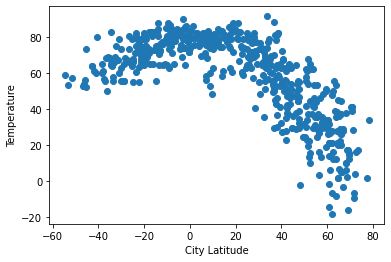

In [11]:
# Latitude vs. Temperature Plot

x_values = weather_data['lat']
y_values = weather_data['temp_max']
plt.scatter(x_values,y_values)
plt.xlabel('City Latitude')
plt.ylabel('Temperature')
plt.show()

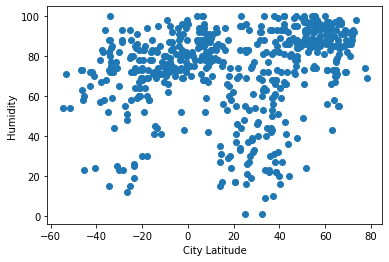

In [12]:
# Latitude vs. Humidity Plot

x_values = weather_data['lat']
y_values = weather_data['humidity']
plt.scatter(x_values,y_values)
plt.xlabel('City Latitude')
plt.ylabel('Humidity')
plt.show()

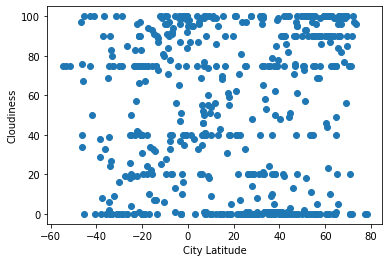

In [13]:
# Latitude vs. Cloudiness Plot

x_values = weather_data['lat']
y_values = weather_data['cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness')
plt.show()

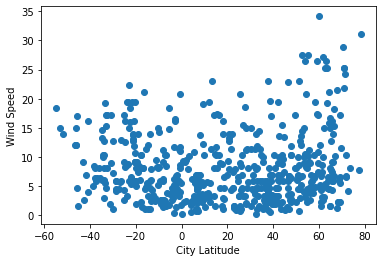

In [14]:
# Latitude vs. Wind Speed Plot

x_values = weather_data['lat']
y_values = weather_data['wind speed']
plt.scatter(x_values,y_values)
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed')
plt.show()

In [15]:
# Northern Hemisphere - Max Temp vs. Latitidue Linear Regression

northern_df = weather_data.loc[weather_data['lat'] > 0]

x_values = northern_df['lat']
y_values = northern_df['temp_max']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

2      20.587079
3      49.637559
5      27.735516
8      63.913188
9      12.057816
         ...    
569    33.991725
572    38.219181
573    38.782133
574    80.132597
576    24.092256
Name: lat, Length: 390, dtype: float64


In [16]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -1.06x +94.36


The r-value is: 0.71554786500187


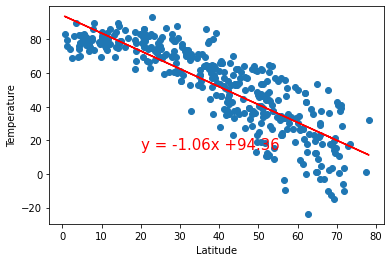

In [17]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

y = 0.46x +80.85
The r-value is: 0.44801196843331303


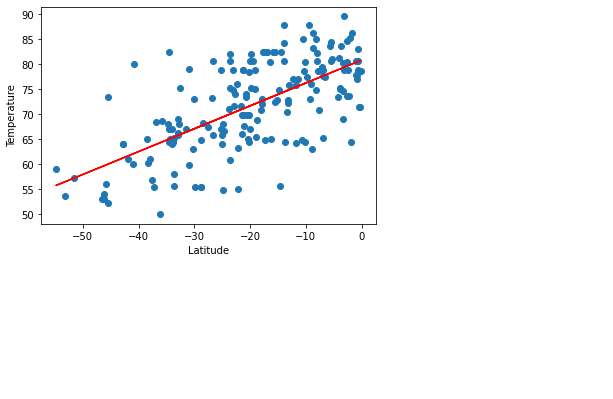

In [16]:
# Southern Hemisphere - Max Temp vs. Latitidue Linear Regression

southern_df = weather_data.loc[weather_data['lat'] < 0]

x_values = southern_df['lat']
y_values = southern_df['temp_max']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

y = 0.27x +63.59
The r-value is: 0.058330910501323295


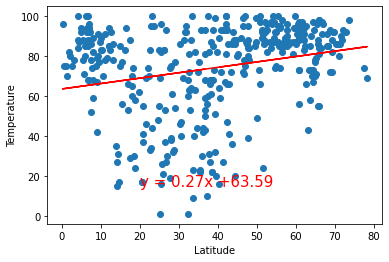

In [20]:
# Northern Hemisphere - Humidity(%) vs. Latitidue Linear Regression

northern_df = weather_data.loc[weather_data['lat'] > 0]

x_values = northern_df['lat']
y_values = northern_df['humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

y = 0.39x +78.18
The r-value is: 0.08364051460688877


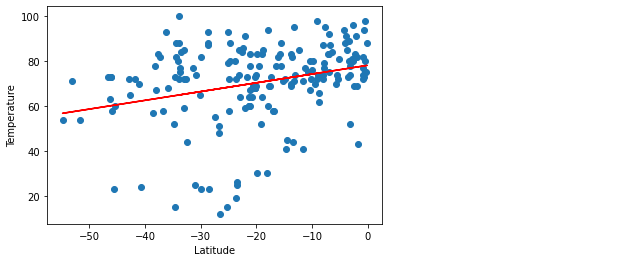

In [17]:
# Southern Hemisphere - Humidity(%) vs. Latitidue Linear Regression

southern_df = weather_data.loc[weather_data['lat'] < 0]

x_values = southern_df['lat']
y_values = southern_df['humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

y = 0.35x +37.42
The r-value is: 0.030001499328725447


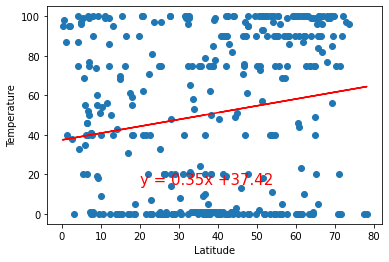

In [21]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

northern_df = weather_data.loc[weather_data['lat'] > 0]

x_values = northern_df['lat']
y_values = northern_df['cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

y = 0.46x +61.02
The r-value is: 0.027941131650021798


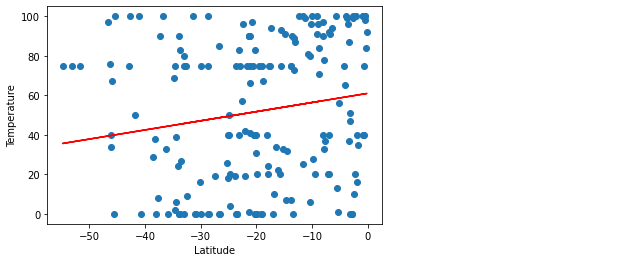

In [18]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

southern_df = weather_data.loc[weather_data['lat'] < 0]

x_values = southern_df['lat']
y_values = southern_df['cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

y = 0.08x +4.65
The r-value is: 0.07069232197671124


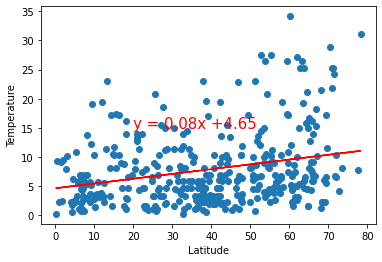

In [22]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

northern_df = weather_data.loc[weather_data['lat'] > 0]

x_values = northern_df['lat']
y_values = northern_df['wind speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

y = -0.1x +6.38
The r-value is: 0.06438980706143838


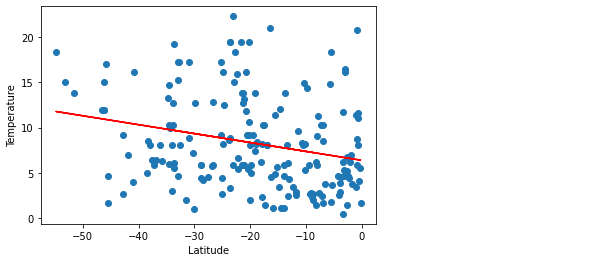

In [23]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

southern_df = weather_data.loc[weather_data['lat'] < 0]

x_values = southern_df['lat']
y_values = southern_df['wind speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()